# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.optim as optim
from IPython.display import clear_output

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

---
## Задача 1

Напишите  нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. 

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$ (например из лекции).

In [4]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
X = torch.tensor(X)
y =  torch.sin(2 * X) + torch.sin(60 * X)

assert y.shape == (sample_size, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию и случайный лес. 

In [6]:
model_n = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1), 
    # та же ф-ция активации, что и раньше, только из pytorch 
    nn.ReLU(),  
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=1, out_features=1)  
)

model_n

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.
    
    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''
    y_pred = y_pred.detach()
    loss = loss.item()
    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.title("NN train")
    plt.show()

    print(f"MSE = {loss:.5f}")

In [8]:
X_train_new = X_train.reshape(-1, 1)
y_train_new = y_train.reshape(-1, 1)

In [9]:
for p in model_n.parameters():
    p.data = p.data = torch.ones(p.data.shape, dtype=torch.float64)
    print(p.data)

tensor([[1.]], dtype=torch.float64)
tensor([1.], dtype=torch.float64)
tensor([[1.]], dtype=torch.float64)
tensor([1.], dtype=torch.float64)


In [10]:
optimizer = torch.optim.SGD(model_n.parameters(), lr=0.01)
optim_func = nn.MSELoss()

In [11]:
num_iter = 10000
prev_loss = torch.DoubleTensor([[-1]])
for i in range(num_iter):
    y_pred = model_n(X_train_new)
    loss = optim_func(y_pred, y_train_new)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 1 == 0:
        clear_output(wait=True)
        print(f"MSE = {loss:.5f}")
        diff = prev_loss.item() - loss.item()
        prev_loss = loss.clone().detach()
        if diff < 0.00001 and diff > 0:
            print("Готово!")
            break
predict_nn = model_n(X_test.reshape(-1, 1)).detach().numpy()

MSE = 0.88301
Готово!


In [12]:
model_linear = LinearRegression() 
model_linear.fit(X_train, y_train)
predict_linear = model_linear.predict(X_test)

In [13]:
model_forest = RandomForestRegressor() 
model_forest.fit(X_train, y_train)
predict_forest = model_forest.predict(X_test)

/var/folders/kq/rsc3dv3j4b31s60ff2hq8xwm0000gn/T/ipykernel_34752/1557026596.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

MSE: 0.9212602346655173


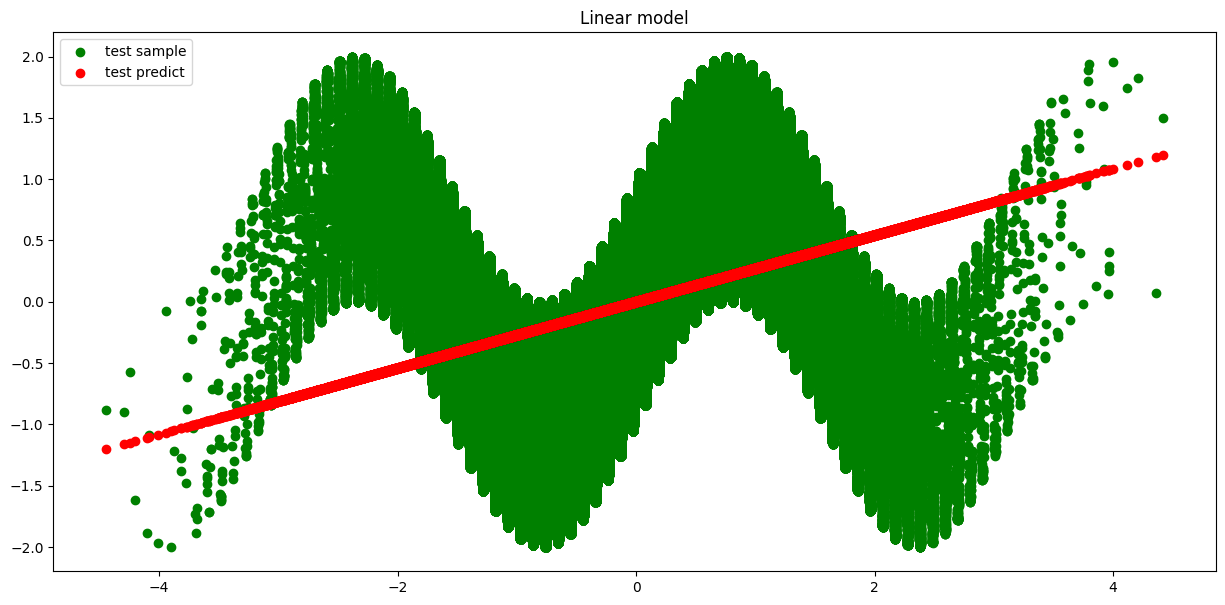

In [14]:
plt.figure(figsize=(15, 7))
plt.scatter(X_test, y_test, c="g", label="test sample")
plt.scatter(X_test, predict_linear, c="r", label="test predict")
plt.title("Linear model")
plt.legend();
print("MSE:", mean_squared_error(y_test, predict_linear))

MSE: 9.991357022207294e-06


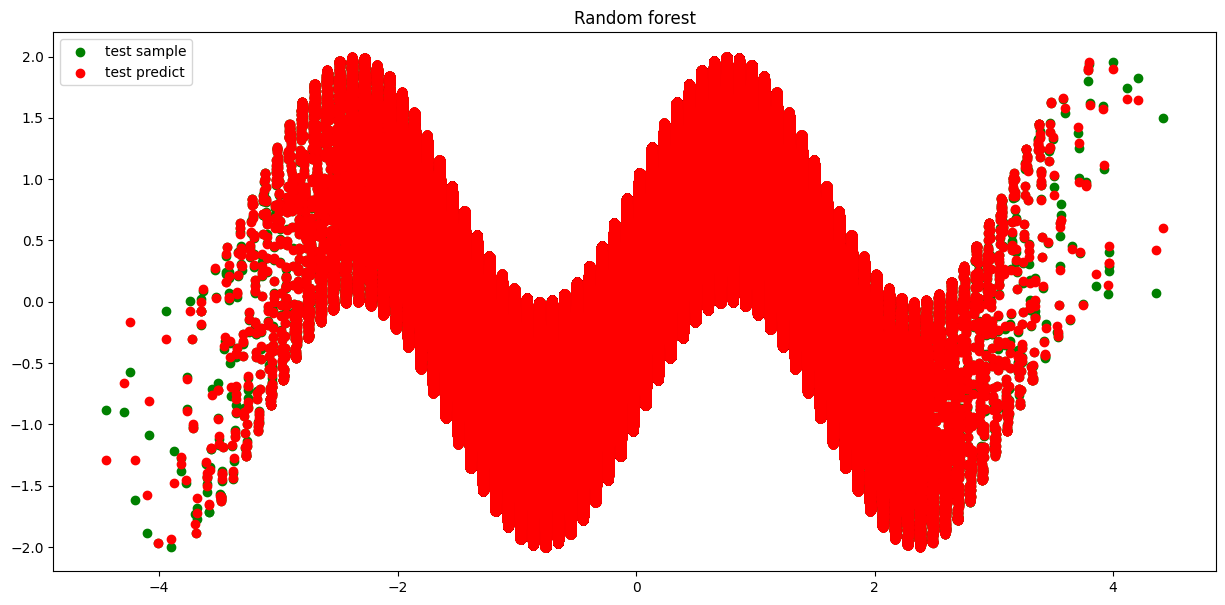

In [15]:
plt.figure(figsize=(15, 7))
plt.scatter(X_test, y_test, c="g", label="test sample")
plt.scatter(X_test, predict_forest, c="r", label="test predict")
plt.title("Random forest")
plt.legend();
print("MSE:", mean_squared_error(y_test, predict_forest))

MSE: 0.8771530892246441


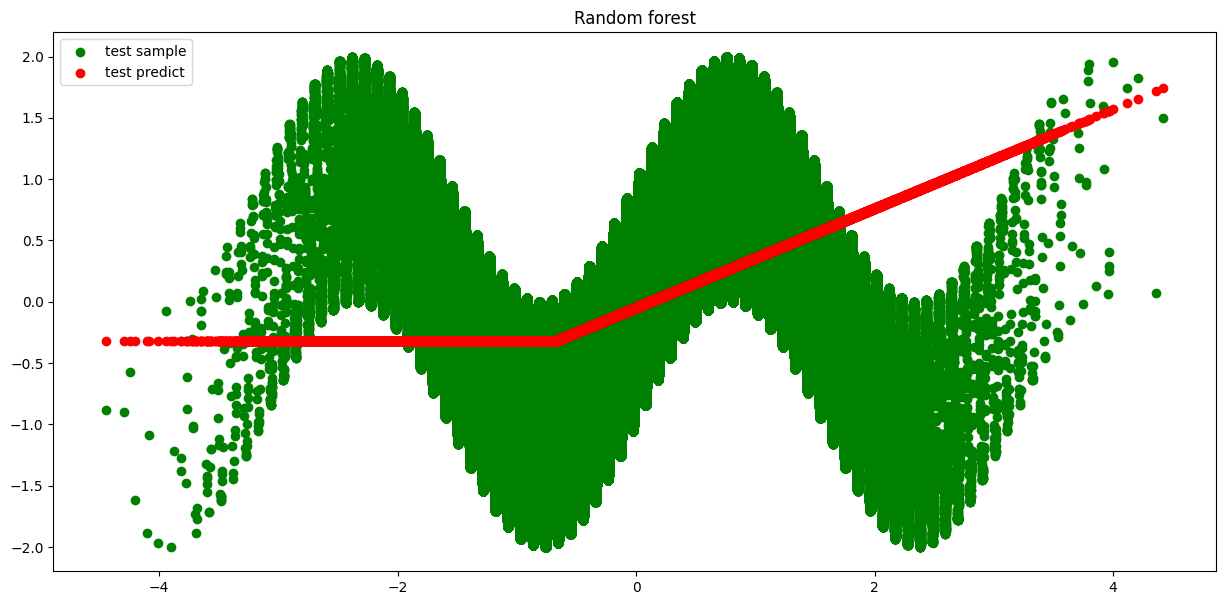

In [16]:
plt.figure(figsize=(15, 7))
plt.scatter(X_test, y_test, c="g", label="test sample")
plt.scatter(X_test, predict_nn, c="r", label="test predict")
plt.title("Random forest")
plt.legend();
print("MSE:", mean_squared_error(y_test, predict_nn))

Повторите вычисления для нелинейной функции, зависящей от двух параметров $f(x, y)$.

In [17]:
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px

pyo.init_notebook_mode(connected=True)

def plot_reults_3d(X_true, y_true, y_pred):
    df_x = pd.DataFrame(X_true)
    df_x.columns = ["x", "y"]
    df_1 = df_x.assign(z=y_true).assign(flag="test sample")
    df_2 = df_x.assign(z=y_pred).assign(flag="prediction")
    df = pd.concat([df_1, df_2])
    fig = px.scatter_3d(df, x="x", y="y", z="z", color="flag")
    fig.show()

In [19]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 2))
X = torch.tensor(X)
y = torch.sin(2 * X[:, 0]) + torch.sin(3 * X[:, 1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [21]:
model_n = nn.Sequential(
    # кол-во признаков во входном слое 2, в выходном тоже 1
    nn.Linear(in_features=2, out_features=2), 
    # та же ф-ция активации, что и раньше, только из pytorch 
    nn.ReLU(),  
    # кол-во признаков во входном слое 1, в выходном тоже 1
    nn.Linear(in_features=2, out_features=1)  
)

model_n

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [22]:
X_train_new = X_train.reshape(-1, 2)
y_train_new = y_train.reshape(-1, 1)

In [23]:
for p in model_n.parameters():
    p.data = torch.ones(p.data.shape, dtype=torch.float64)
    print(p.data)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)
tensor([1., 1.], dtype=torch.float64)
tensor([[1., 1.]], dtype=torch.float64)
tensor([1.], dtype=torch.float64)


In [24]:
optimizer = torch.optim.SGD(model_n.parameters(), lr=0.01)
optim_func = nn.MSELoss()

In [25]:
num_iter = 10000
prev_loss = torch.DoubleTensor([[-1]])
for i in range(num_iter):
    y_pred = model_n(X_train_new)
    loss = optim_func(y_pred, y_train_new)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 1 == 0:
        clear_output(wait=True)
        print(f"MSE = {loss:.5f}")
        diff = prev_loss.item() - loss.item()
        prev_loss = loss.clone().detach()
        if diff < 0.00001 and diff > 0:
            print("Готово!")
            break
predict_nn = model_n(X_test.reshape(-1, 2)).detach().numpy()

MSE = 0.88205
Готово!


In [26]:
model_linear = LinearRegression() 
model_linear.fit(X_train, y_train)
predict_linear = model_linear.predict(X_test)

In [27]:
model_forest = RandomForestRegressor() 
model_forest.fit(X_train, y_train)
predict_forest = model_forest.predict(X_test)

In [31]:
#plot_reults_3d(X_test, y_test, predict_linear)
print("MSE:", mean_squared_error(y_test, predict_linear))

MSE: 0.9295699624745065


In [32]:
#plot_reults_3d(X_test, y_test, predict_forest)
print("MSE:", mean_squared_error(y_test, predict_forest))

MSE: 4.9010632763273934e-05


In [33]:
#plot_reults_3d(X_test, y_test, predict_nn)
print("MSE:", mean_squared_error(y_test, predict_nn))

MSE: 0.8871526841287578


**Вывод:**

Линейная можель, как и ожидалось, плохо справляется с предсказанием нелинейной функции. Двухслойная нейронная сеть же в свою очередь предсказывает лучше, но в силу простоты организации сети (два линейных слоя с функцией пропускания ReLU посередине) не может предсказывать значения достаточно хорошо.

Для случайного леса ситуация намного лучше, его предсказания самые точные и очень близки к действительным. Единственным минусом является лишь то, что подобный результат будет достигаться на тех отрезках, на которых был определен трейн, когда как достаточно сложно организованная нейросеть сможет предсказывать значения за пределами ее области обучения.

P.S. Можно раскомментировать строчки plot_results_3d() и посмотреть на красивые интерактивные 3д графики сравнения

---
## Задача 2

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
...